# LabelPropagation example
## 필요한 패키지 부르기

<img src='image/img8.png' width='600'></img>

In [6]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report

In [7]:
# load data
data = datasets.load_iris()

In [8]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.DataFrame(data['target'], columns=['label'])

In [9]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [11]:
data = pd.concat([X, y], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
# Split train dataset & test dataset 
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [13]:
X_train, y_train = train.drop(['label'], axis=1), train.loc[:, 'label']
X_test, y_test = test.drop(['label'], axis=1), test.loc[:, 'label']
del(train, test)

In [14]:
# Check indices of train dataset
indices_train = list(X_train.index)
print(indices_train)

[137, 84, 27, 127, 132, 59, 18, 83, 61, 92, 112, 2, 141, 43, 10, 60, 116, 144, 119, 108, 69, 135, 56, 80, 123, 133, 106, 146, 50, 147, 85, 30, 101, 94, 64, 89, 91, 125, 48, 13, 111, 95, 20, 15, 52, 3, 149, 98, 6, 68, 109, 96, 12, 102, 120, 104, 128, 46, 11, 110, 124, 41, 148, 1, 113, 139, 42, 4, 129, 17, 38, 5, 53, 143, 105, 0, 34, 28, 55, 75, 35, 23, 74, 31, 118, 57, 131, 65, 32, 138, 14, 122, 19, 29, 130, 49, 136, 99, 82, 79, 115, 145, 72, 77, 25, 81, 140, 142, 39, 58, 88, 70, 87, 36, 21, 9, 103, 67, 117, 47]


In [15]:
# Shuffle them
random.shuffle(indices_train)
print(indices_train)

[77, 36, 137, 84, 72, 98, 127, 69, 92, 70, 39, 35, 91, 79, 21, 105, 94, 140, 113, 118, 130, 89, 146, 104, 85, 31, 109, 18, 143, 124, 120, 41, 111, 1, 117, 25, 138, 2, 28, 5, 96, 101, 6, 57, 102, 15, 46, 32, 59, 82, 61, 147, 129, 19, 42, 81, 131, 3, 55, 52, 83, 136, 12, 103, 47, 106, 10, 29, 110, 112, 68, 87, 9, 88, 48, 50, 60, 128, 20, 17, 142, 115, 0, 149, 95, 108, 135, 139, 67, 38, 148, 119, 74, 99, 80, 145, 53, 116, 64, 65, 43, 56, 13, 122, 75, 11, 30, 23, 141, 58, 34, 132, 14, 27, 125, 4, 133, 49, 123, 144]


In [16]:
# Generate unlabel data
y_train_true = y_train.copy()

In [17]:
unlabeled_ratio = 0.2
indices_unlabeled = indices_train[int(len(indices_train)*(1-unlabeled_ratio)):]

In [18]:
print("The number of real train data: %d \n the number of unlabeled data: %d"%(
    len(indices_train), len(indices_unlabeled)
))

The number of real train data: 120 
 the number of unlabeled data: 24


In [19]:
y_train.loc[indices_unlabeled] = -1
y_train

137    2
84     1
27    -1
127    2
132   -1
      ..
9      0
103    2
67     1
117    2
47     0
Name: label, Length: 120, dtype: int64

In [20]:
# Min Max scaling
scaler = MinMaxScaler().fit(X_train.values)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [21]:
# Four dimension to Two dimension using t-SNE
# Visualize real train dataset and unlabeled data
tSNE = TSNE(random_state=0, n_jobs=-1)
X_embedded = pd.DataFrame(tSNE.fit_transform(X_train), index=X_train.index, columns=[0, 1])

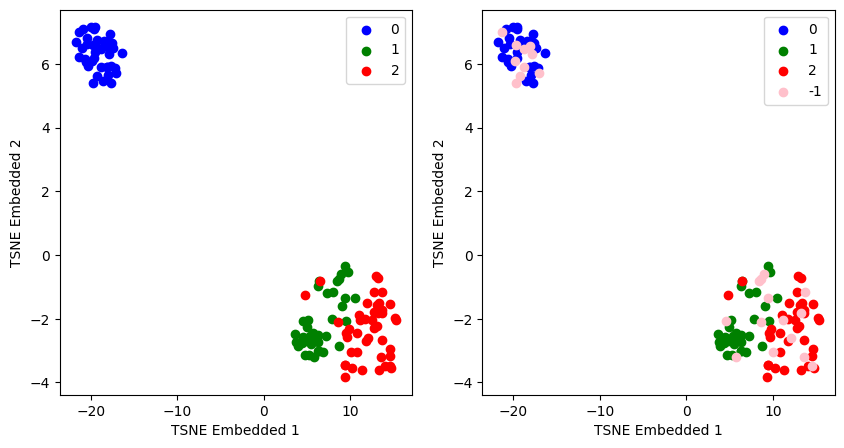

In [28]:
colors = ['b', 'g', 'r', 'pink']
legends = ['0', '1', '2', '-1']
plt.figure(figsize=(10, 5))
plt.subplot(121)
for c in [0, 1, 2]:
    tmp_y = y_train_true[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.legend()

plt.subplot(122)
for c in [0, 1, 2, -1]:
    tmp_y = y_train[y_train==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    if c == -1:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[-1], label=legends[-1])
    else:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.legend()
plt.show()

In [29]:
# Build LabelPropagation model
model = LabelPropagation(
    kernel='knn',
    n_neighbors=3,
    max_iter=100,
    tol=1e-3,
    n_jobs=-1
)
model.fit(X_train.values, y_train.values)

LabelPropagation(kernel='knn', max_iter=100, n_jobs=-1, n_neighbors=3)

In [30]:
# Evaluate prediction results
y_train_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_test_pred = pd.Series(model.predict(X_test), index=y_test.index)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LabelPropagation was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LabelPropagation was fitted without feature names
  warnings.warn(


In [31]:
print(classification_report(y_train_true, y_train_pred, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.97      0.95        37
           2       0.98      0.93      0.95        44

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [32]:
print(classification_report(y_test, y_test_pred, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



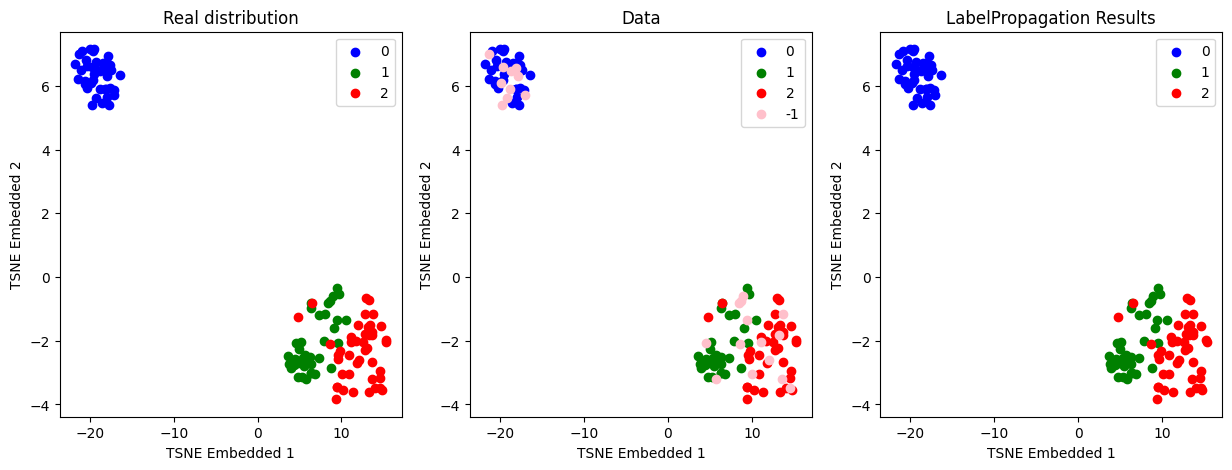

In [35]:
# Visualize results of labelpropagation
plt.figure(figsize=(15, 5))
plt.subplot(131)
for c in [0, 1, 2]:
    tmp_y = y_train_true[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.title('Real distribution')
plt.legend()

plt.subplot(132)
for c in [0, 1, 2, -1]:
    tmp_y = y_train[y_train==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    if c == -1:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[-1], label=legends[-1])
    else:
        plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.title('Data')
plt.legend()

plt.subplot(133)
for c in [0, 1, 2]:
    tmp_y = y_train_pred[y_train_true==c]
    tmp_x = X_embedded.loc[list(tmp_y.index), :]
    
    plt.scatter(tmp_x[0], tmp_x[1], color=colors[c], label=legends[c])
plt.xlabel('TSNE Embedded 1')
plt.ylabel('TSNE Embedded 2')
plt.title('LabelPropagation Results')
plt.legend()

plt.show()

## SVM vs Label Propagation

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.semi_supervised import LabelPropagation


iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [4]:
# step size in the mesh
h = 0.02

rng = np.random.RandomState(0)
y_rand = rng.rand(y.shape[0])
y_30 = np.copy(y)
y_30[y_rand < 0.3] = -1  # set random samples to be unlabeled
y_50 = np.copy(y)
y_50[y_rand < 0.5] = -1
y_70 = np.copy(y)
y_70[y_rand < 0.7] = -1

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
lp30 = (LabelPropagation(kernel='knn', n_neighbors=30).fit(X, y_30), y_30, "Label Porpagation 30% data")
lp50 = (LabelPropagation(kernel='knn', n_neighbors=30).fit(X, y_50), y_50, "Label Porpagation 50% data")
lp70 = (LabelPropagation(kernel='knn', n_neighbors=30).fit(X, y_70), y_70, "Label Porpagation 70% data")

rbf_svc = (SVC(kernel="rbf", gamma=0.5).fit(X, y), y, "SVC with rbf kernel")

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

color_map = {-1: (1, 1, 1), 0: (0, 0, 0.9), 1: (1, 0, 0), 2: (0.8, 0.6, 0)}

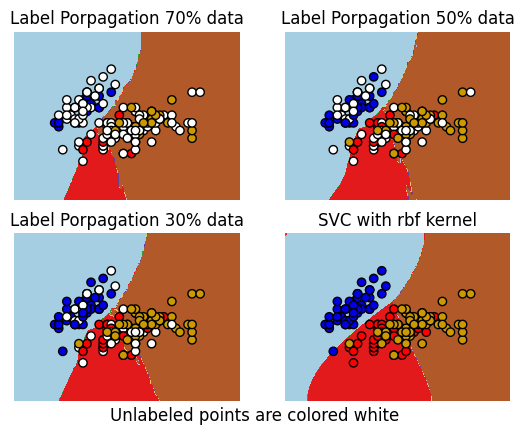

In [37]:
classifiers = (lp70, lp50, lp30, rbf_svc)
for i, (clf, y_train, title) in enumerate(classifiers):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("off")

    # Plot also the training points
    colors = [color_map[y] for y in y_train]
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors="black")

    plt.title(title)

plt.suptitle("Unlabeled points are colored white", y=0.1)
plt.show()